In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gauravpks/ml-repo/master/Model%20Selection%20_%20Boosting/Regression/Data.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values 

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) 

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
from sklearn.linear_model import LinearRegression
regessor = LinearRegression()
regessor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_prdct = regessor.predict(x_test)
y_prdct

array([474.30362366, 447.80177397, 472.85862185, ..., 461.91948145,
       462.69507271, 450.03928364])

In [8]:
x_test

array([[-1.34343669, -1.11233862, -0.94990321,  1.1386252 ],
       [ 0.62756902, -0.19673208,  0.2834393 , -0.9109634 ],
       [-1.01917878, -1.1084056 , -1.2986763 , -0.33757065],
       ...,
       [-0.32644598, -1.0863807 , -2.08046719, -0.18106656],
       [-0.51939283, -0.73555552,  0.0256505 ,  0.58710203],
       [ 0.33144919,  0.87304876,  0.59009004, -1.3182841 ]])

In [9]:
np.set_printoptions(precision=2)
print(np.concatenate((y_prdct.reshape(len(y_prdct),1),y_test.reshape(len(y_test),1)),1))

[[474.3  479.56]
 [447.8  447.7 ]
 [472.86 477.61]
 ...
 [461.92 461.31]
 [462.7  460.22]
 [450.04 447.92]]


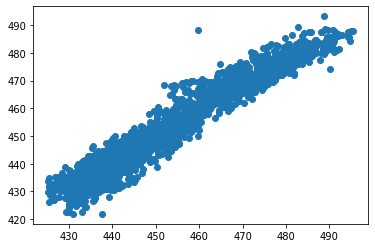

In [10]:
plt.scatter(y_test,regessor.predict(x_test));

In [11]:
from sklearn import metrics

In [12]:
print('R2:', metrics.r2_score(y_test, regessor.predict(x_test)))

R2: 0.9307563089481498
